# Prática 03: Filtragem e Transformada de Fourier
- Preparação do ambiente:


In [154]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

## Questão 1:
Gere um sinal que é a soma de duas funções cosseno com frequências angulares iguais 
a 0,2π e 0,8π; amplitudes iguais a 1 e 2, e fases iniciais iguais a 0, ou seja:
$$
    x[n] = \cos(0,2\pi n) + 2\cos(0,8\pi n).
$$

Este sinal deve possuir N=60 pontos. Gere o gráfico deste sinal [sin,figure,plot].

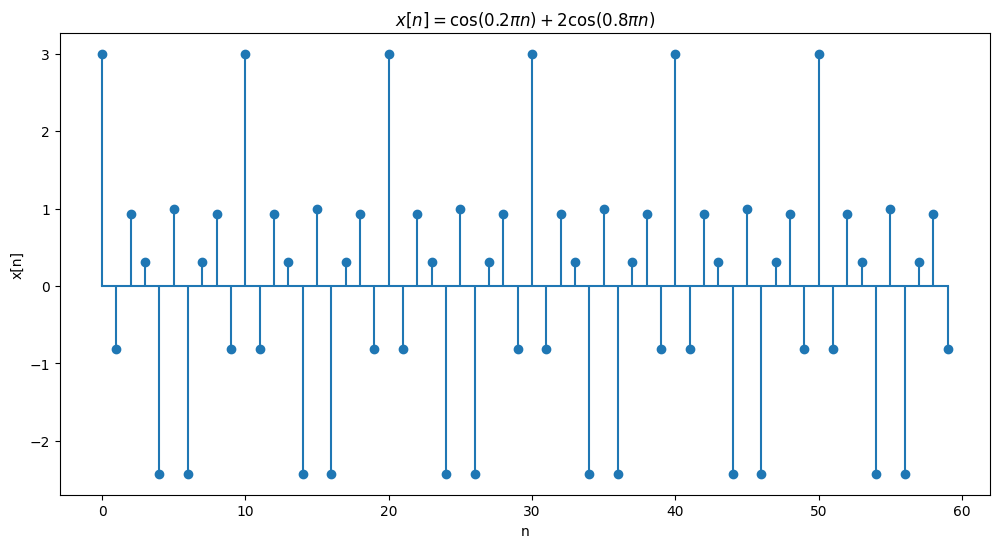

In [155]:
#Definindo as N amostras (com N = 60)
N = 60
n_samples = np.arange(0,N)

#Definindo o sinal:
def x(n):
    return np.cos(0.2 * pi * n) + 2 * np.cos(0.8 * pi * n)

x_n = x(n_samples)

#Plotando o gráfico
plt.figure(figsize=(12,6))
plt.stem(n_samples, x_n, basefmt= "")

#Estilização
plt.title(r"$x[n] = \cos(0.2 \pi n) + 2\cos(0.8 \pi n)$")
plt.xlabel("n")
plt.ylabel("x[n]")

plt.show()




## Quetão 2
Gere o gráfico do módulo da Transformada de Fourier deste sinal x[n] [figure, plot, fft, 
fftshift, abs, linspace]. Não esqueça de colocar as frequências corretas no eixo x. 

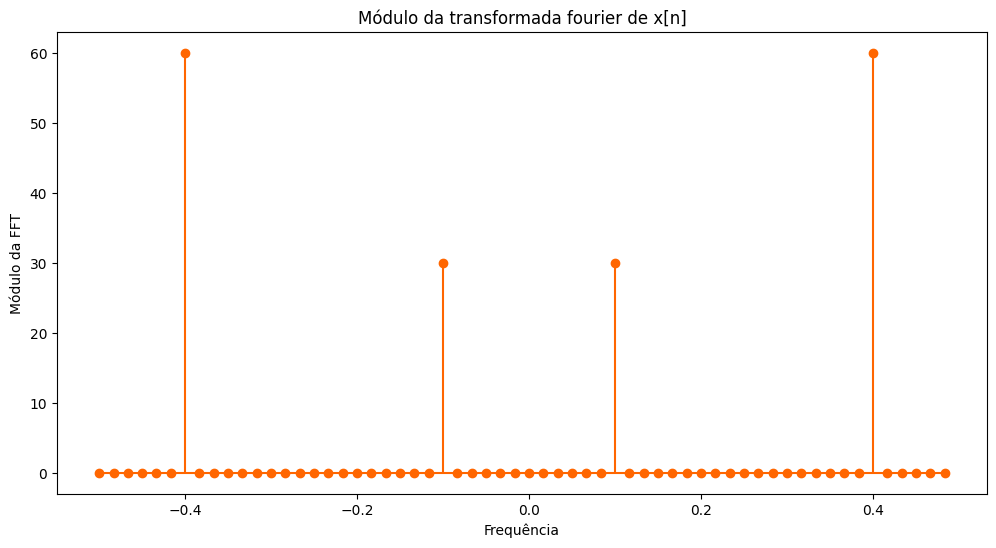

In [186]:
#Gerando a transformada de Fourier, o módulo da FFT e as frequências
def fft(x_n):
    X_k = np.fft.fft(x_n)
    X_k_shifted = np.fft.fftshift(X_k)
    modX_k = np.abs(X_k_shifted)

    return modX_k

X_k = fft(x_n)
X_k_Freq = np.fft.fftshift(np.fft.fftfreq(len(X_k)))

#Plotando a FFT
plt.figure(figsize=(12,6))
plt.stem(X_k_Freq, X_k, basefmt="#ff6600", linefmt="#ff6600")

#Estilização
plt.title("Módulo da transformada fourier de x[n]")
plt.xlabel("Frequência")
plt.ylabel("Módulo da FFT")

plt.show()


### Questão 3:
 Gere uma resposta ao impulso de um sistema LIT dada por:  

$$
    h[n] = 
    \begin{cases} 

    \frac{\sin(0.5 \pi (n-10))}{\pi (n-10)}, & \text{se } 0 \leq n \leq 20 \text{ e } n \neq 10, \\
    0.5, & \text{para } n =10, \\
    0, & \text{caso contrário}.

    \end{cases}

$$

 Gere o gráfico desta resposta ao impulso [sin,figure,stem ou plot]. 

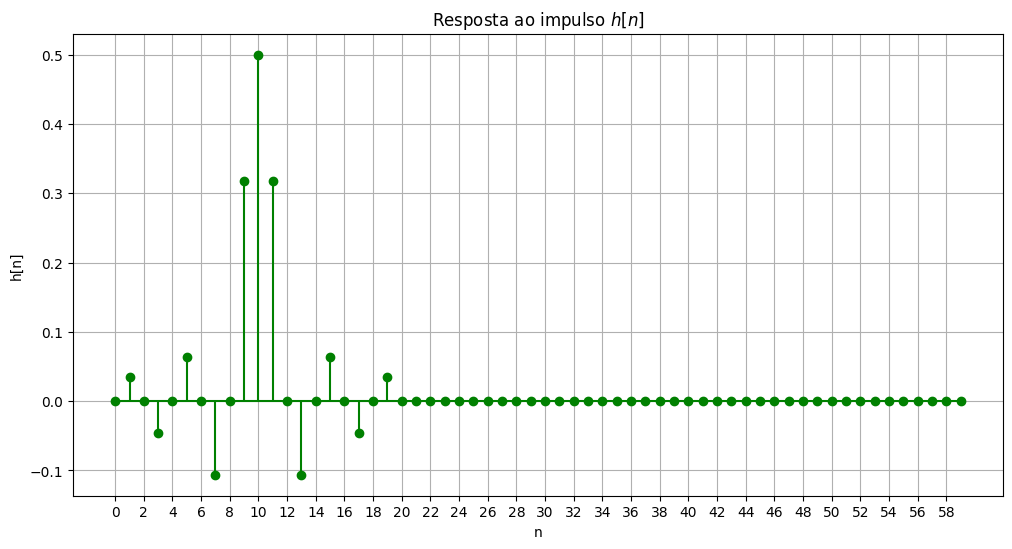

In [157]:
#Criando a função de resposta ao impulso
def h(n:int)-> float:
    if n == 10:
        return 0.5
    elif 0 <= n <= 20:
        return np.sin(0.5 * pi * (n-10)) / (pi * (n-10))
    return 0

h_n = [h(n) for n in n_samples]

#Plotando o gráfico
plt.figure(figsize=(12,6))
plt.stem(n_samples, h_n, basefmt="g", linefmt="g")

#Estilização
plt.title("Resposta ao impulso $h[n]$")
plt.xlabel("n")
plt.ylabel("h[n]")

plt.xticks(n_samples[::2])
plt.grid(True)

plt.show()

### Questão 4

Gere o gráfico do módulo da Resposta em Frequência deste sistema (ou seja, da 
Transformada de Fourier da resposta ao impulso h[n]) [figure, plot, fft, fftshift, abs, 
linspace]. Não esqueça de colocar as frequências corretas no eixo x. 

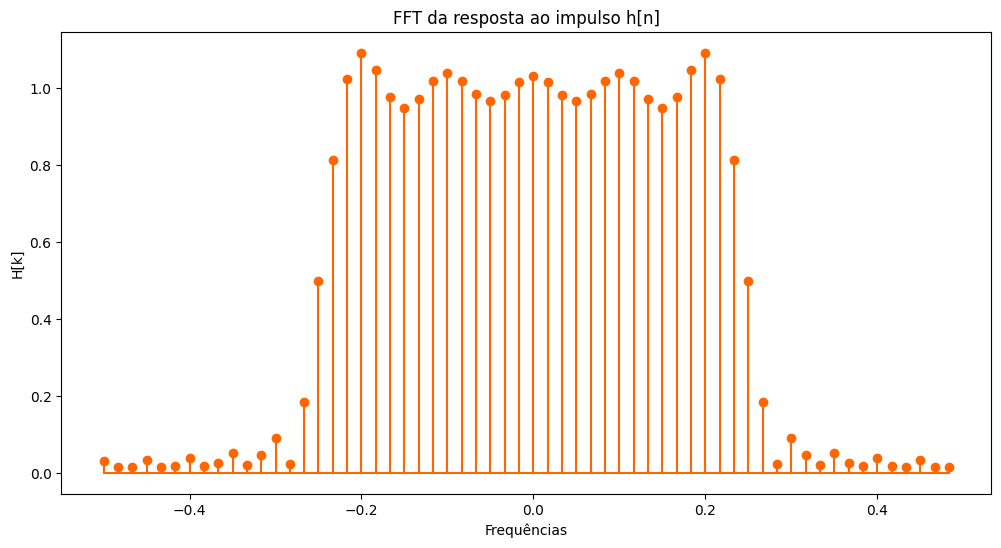

In [158]:
# Calculando a FFT da resposta ao impulso h[n]
H_k = fft(h_n)
H_k_Freq = np.fft.fftshift(np.fft.fftfreq(len(H_k)))

#Plotando o  gráfico
plt.figure(figsize=(12,6))
plt.stem(H_k_Freq, H_k, basefmt="#ff6600", linefmt="#ff6600")

#Estilizações
plt.title("FFT da resposta ao impulso h[n]")
plt.xlabel("Frequências")
plt.ylabel("H[k]")

plt.show()


## Questão 5
Filtre o sinal de questão 1 usando a resposta ao impulso gerada na questão 3. Gere o 
gráfico deste sinal filtrado [conv,figure,plot]. 

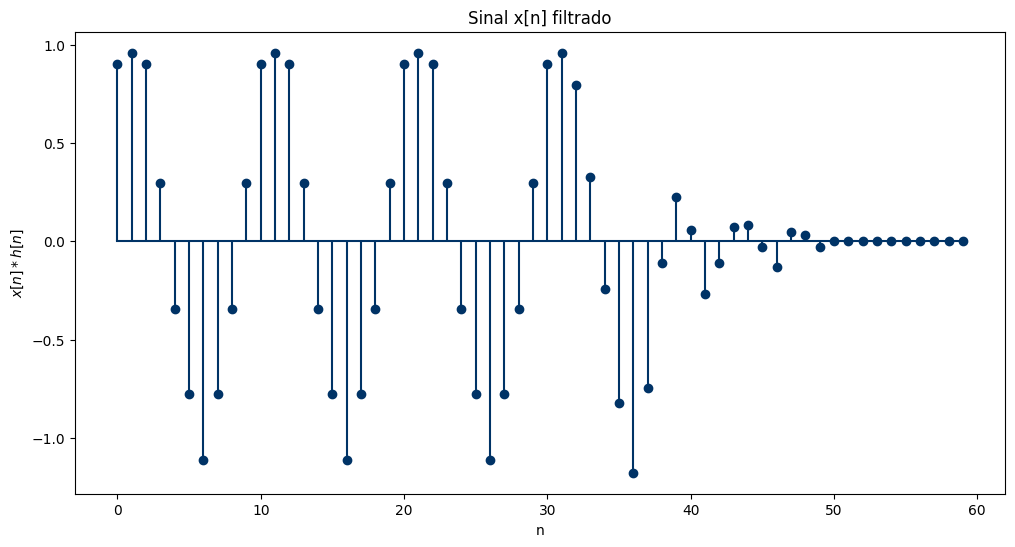

In [191]:
x_filtered = np.convolve(x_n, h_n, "same")

#Plotando o gráfico
plt.figure(figsize=(12,6))
plt.stem(n_samples, x_filtered,  basefmt="#003366", linefmt= "#003366")

#Estilização
plt.title("Sinal x[n] filtrado")
plt.xlabel("n")
plt.ylabel("$x[n]*h[n]$")

plt.show()



## Questão 5
Filtre o sinal de questão 1 usando a resposta ao impulso gerada na questão 3. Gere o 
gráfico deste sinal filtrado [conv,figure,plot]. 

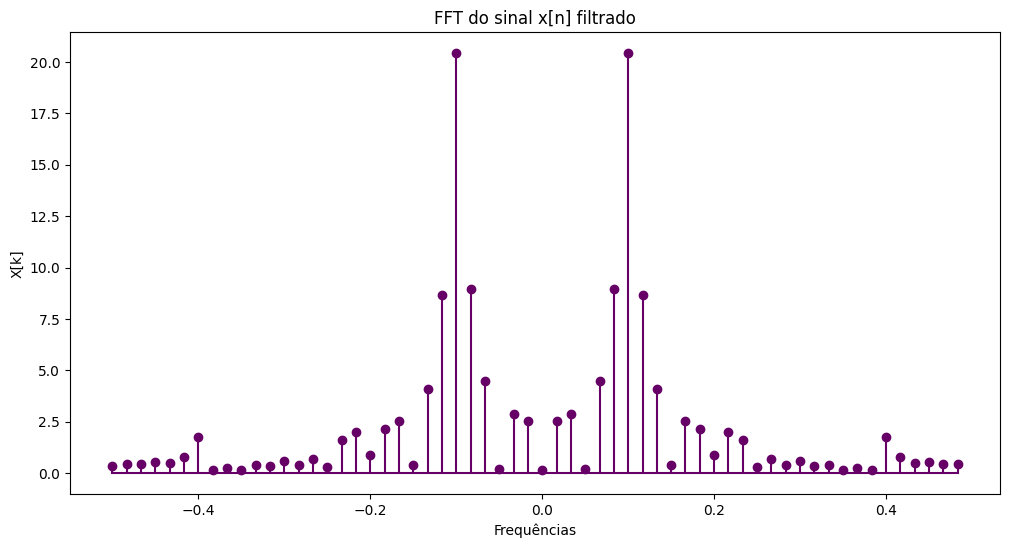

In [192]:
# Calculando a FFT da resposta ao impulso h[n]
X_k_Filtered = fft(x_filtered)
X_k_Freq = np.fft.fftshift(np.fft.fftfreq(len(X_k_Filtered)))

#Plotando o  gráfico
plt.figure(figsize=(12,6))
plt.stem(X_k_Freq, X_k_Filtered, basefmt="#660066", linefmt="#660066")

#Estilizações
plt.title("FFT do sinal x[n] filtrado")
plt.xlabel("Frequências")
plt.ylabel("X[k]")

plt.show()
